# Image DataSet Infos

### kaggle_statefarm : kaggle competition statefarm disctracted driver detection dataset

https://www.kaggle.com/c/state-farm-distracted-driver-detection/data

The 10 classes to predict are:

    c0: safe driving
    c1: texting - right
    c2: talking on the phone - right
    c3: texting - left
    c4: talking on the phone - left
    c5: operating the radio
    c6: drinking
    c7: reaching behind
    c8: hair and makeup
    c9: talking to passenger

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
import matplotlib
import matplotlib.cm as cm
import pickle
%matplotlib inline
import os
import random

# Basic Infos

In [2]:
# image label manual csv
df = pd.read_csv('./imgset/kaggle_statefarm/driver_imgs_list.csv')
df.head()
print(df.shape)
print('test data size : (79726, 11)')
print('classes :',np.unique(df['classname']))
print(np.unique(df['subject']))
print('the total number of image files:',np.unique(df['img']).shape)

(22424, 3)
test data size : (79726, 11)
classes : ['c0' 'c1' 'c2' 'c3' 'c4' 'c5' 'c6' 'c7' 'c8' 'c9']
['p002' 'p012' 'p014' 'p015' 'p016' 'p021' 'p022' 'p024' 'p026' 'p035'
 'p039' 'p041' 'p042' 'p045' 'p047' 'p049' 'p050' 'p051' 'p052' 'p056'
 'p061' 'p064' 'p066' 'p072' 'p075' 'p081']
the total number of image files: (22424,)


(244, 244, 3)


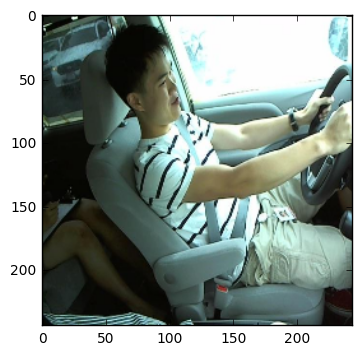

In [132]:
# train image read
#import cv2
img = mpimage.imread('./imgset/kaggle_statefarm/imgs/train/c0/img_44733.jpg')
img = cv2.resize(img, (244,244))
print(img.shape)
plt.imshow(img)

# Preprocessed Image

In [4]:
driver_imgs_list = pd.read_csv('imgset/kaggle_statefarm/driver_imgs_list.csv')
driver_imgs_grouped = driver_imgs_list.groupby('classname')

In [5]:
base = 'imgset/kaggle_statefarm/imgs/train/'
driver_ids_group = driver_imgs_grouped.get_group('c{}'.format(1))
paths = os.path.join(base, 'c{}/'.format(1)) + driver_ids_group.img
np.array(paths.index)
print(paths.head(5))
paths[[76,77]]
driver_ids_group.head(5)
driver_ids_group.iloc[[0],:]
#driver_ids_group[[76],:]
type(driver_ids_group)
type(paths)
driver_ids_group.ix[[76]]

76    imgset/kaggle_statefarm/imgs/train/c1/img_1685...
77    imgset/kaggle_statefarm/imgs/train/c1/img_8410...
78    imgset/kaggle_statefarm/imgs/train/c1/img_1555...
79    imgset/kaggle_statefarm/imgs/train/c1/img_5856...
80    imgset/kaggle_statefarm/imgs/train/c1/img_4562...
Name: img, dtype: object


subject classname            img
76    p002        c1  img_16856.jpg

In [6]:
data = pickle.load(open("./data_64_subset_50.pkl", "rb"))
print(len(data), type(data))
print(data[0].shape)

X_train, y_train, X_test, X_test_ids, driver_ids = data
print(type(X_train), type(y_train), type(X_test), type(X_test_ids))
print(X_train.shape)
print(y_train[0])
print(X_test.shape)
print(X_test_ids[0])
print(driver_ids[0])

5 <class 'tuple'>
(500, 64, 64, 3)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
(500, 64, 64, 3)
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
(50, 64, 64, 3)
img_80683.jpg
p066


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, 
                                                            test_size=0.3, random_state=42)

## Training Dataset

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


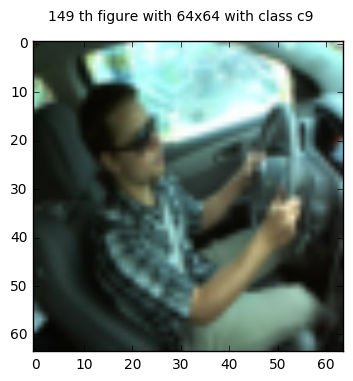

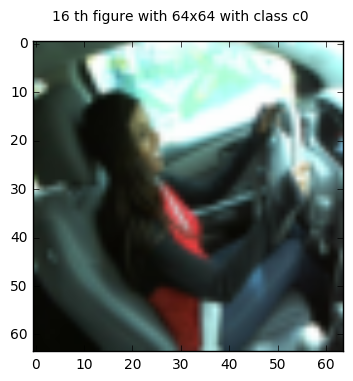

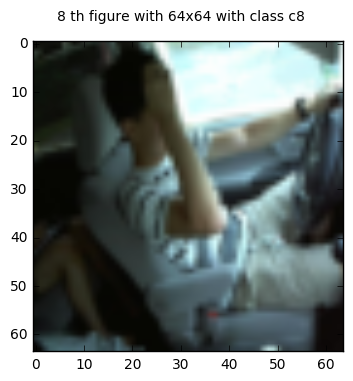

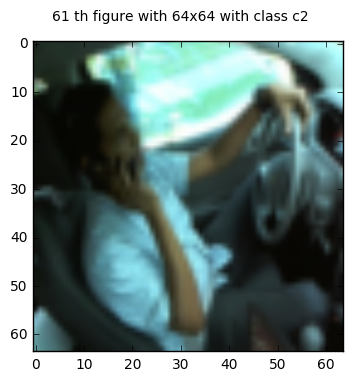

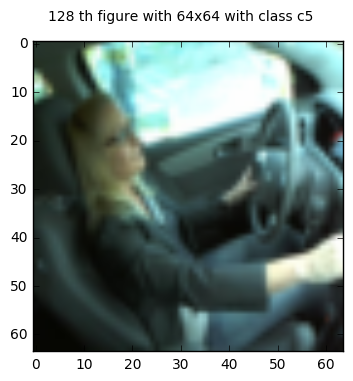

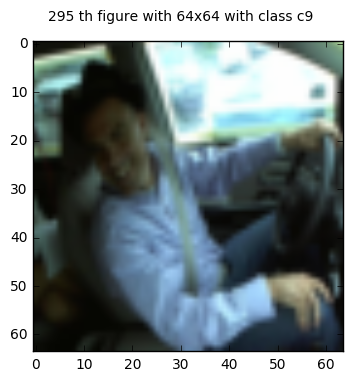

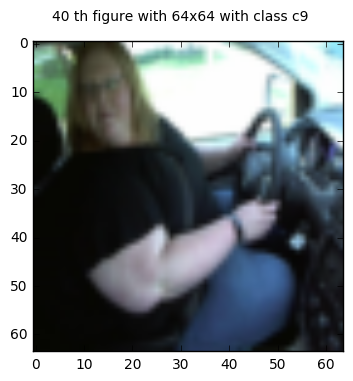

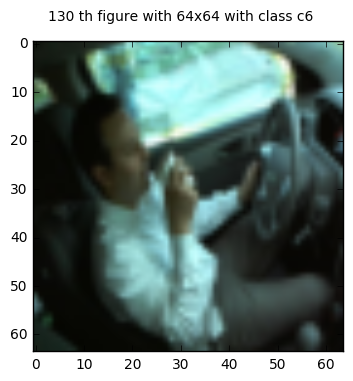

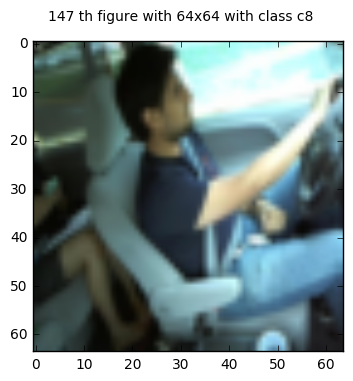

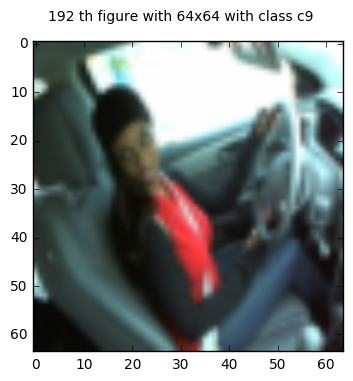

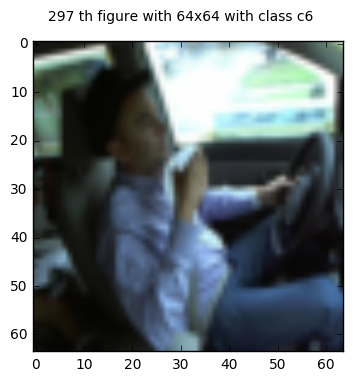

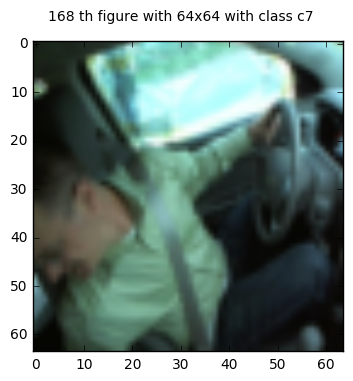

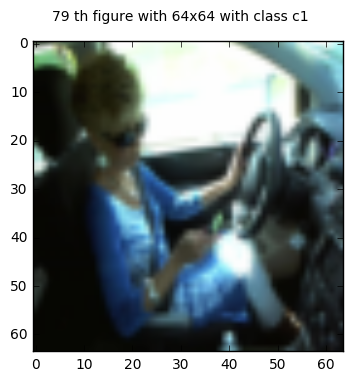

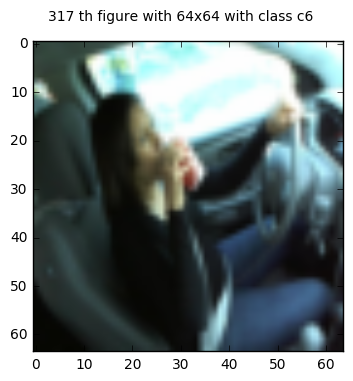

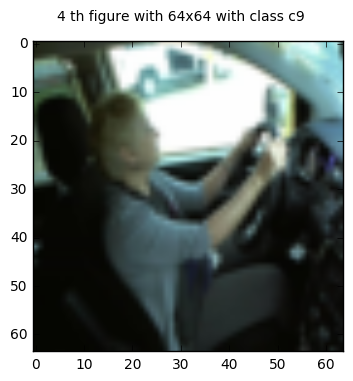

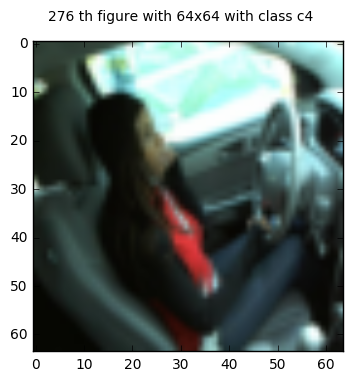

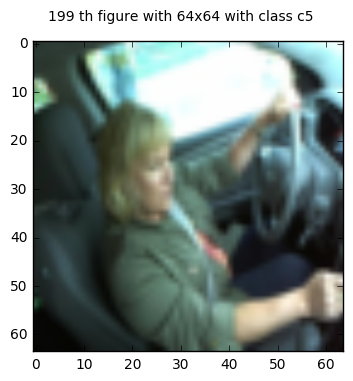

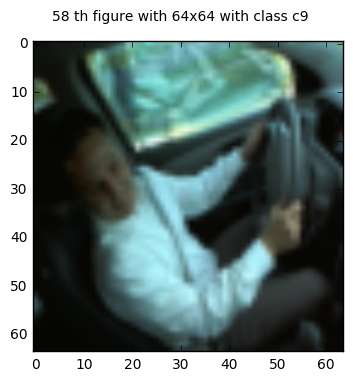

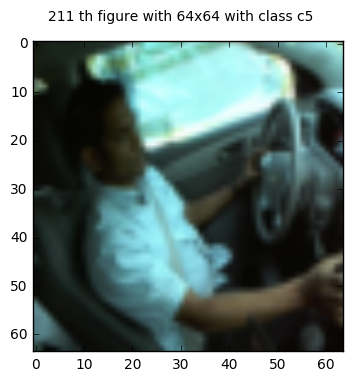

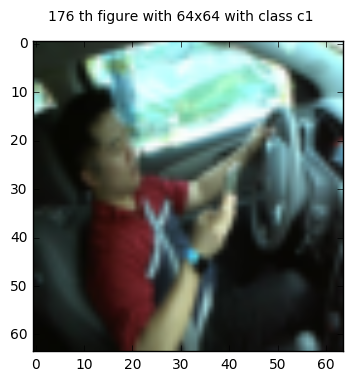

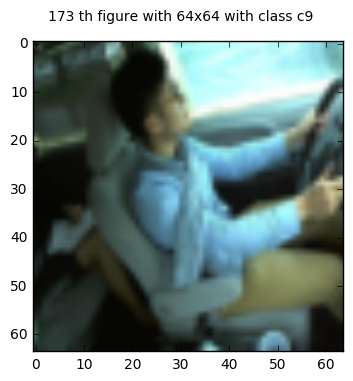

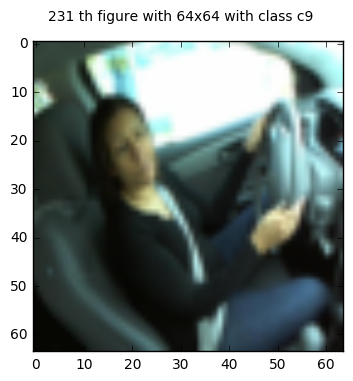

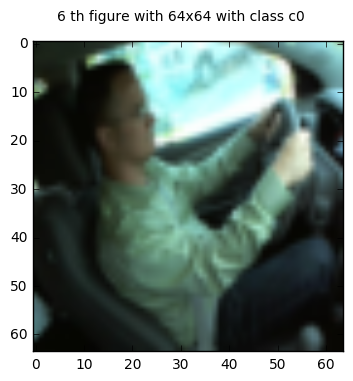

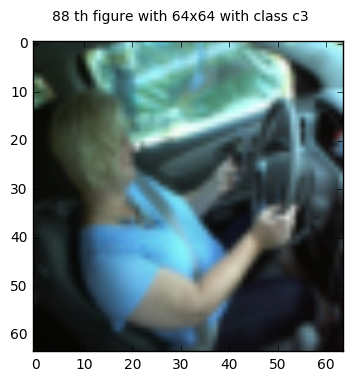

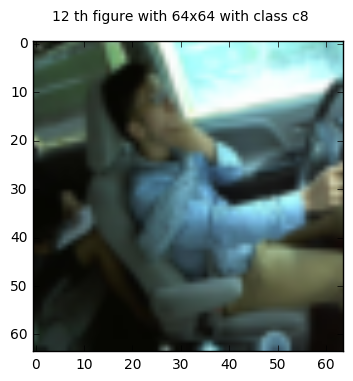

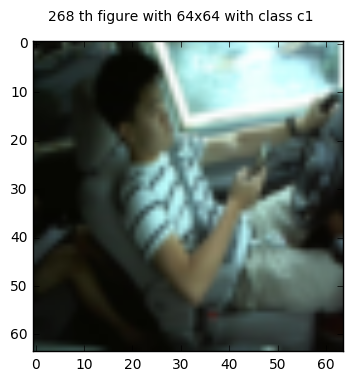

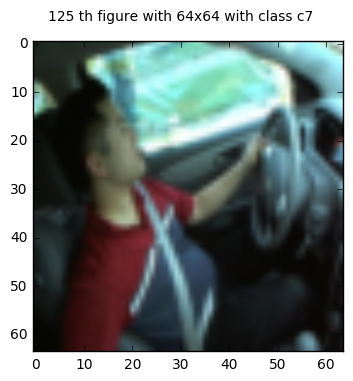

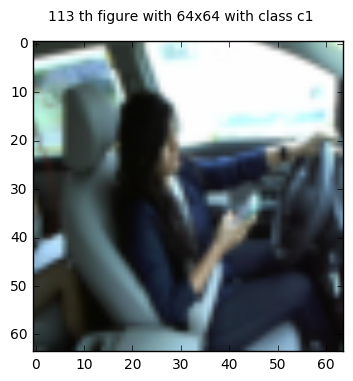

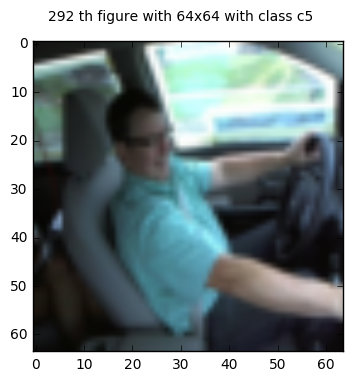

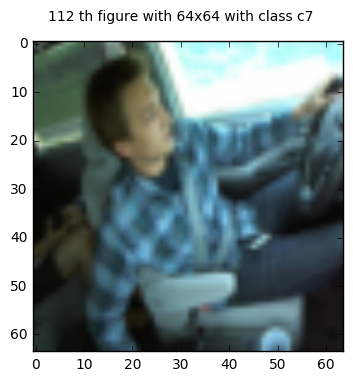

In [8]:
for i, idx in enumerate(random.sample(range(X_train.shape[0]), 30)):
    fig = plt.figure()
    fig.suptitle("{:d} th figure with 64x64 with class c{}".format(idx, np.argmax(y_train[idx])))
    plt.imshow(X_train[idx])

## Validation Dataset

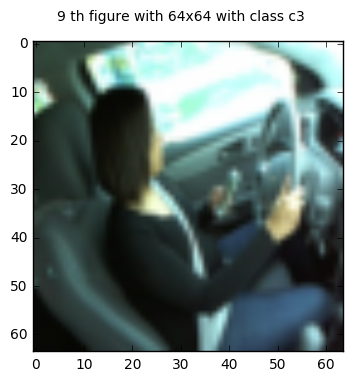

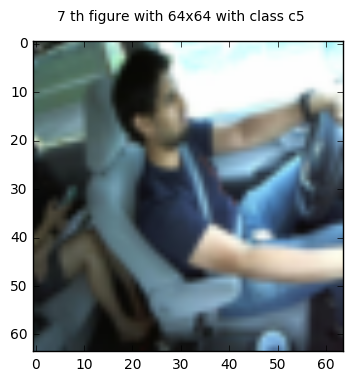

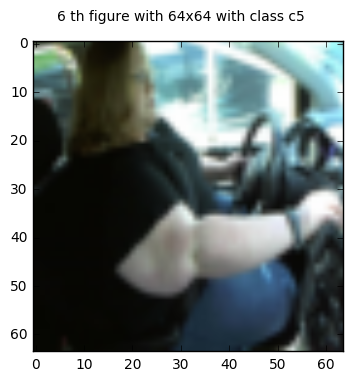

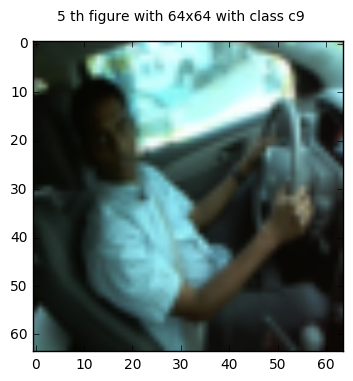

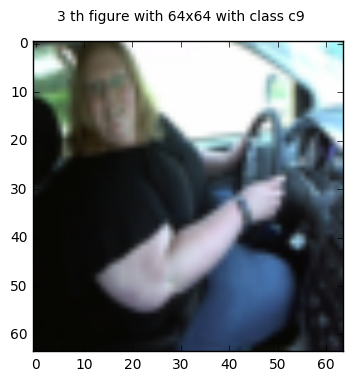

In [36]:
for i, idx in enumerate(random.sample(range(X_valid.shape[0]), 5)):
    fig = plt.figure()
    fig.suptitle("{:d} th figure with 64x64 with class c{}".format(idx, np.argmax(y_valid[idx])))
    plt.imshow(X_valid[idx])

In [9]:
from keras.applications import VGG16
from keras.layers import LeakyReLU, Input, Dense, Flatten
from keras.models import Model

from keras.preprocessing.image import ImageDataGenerator

img_rows=64
img_cols=64
img_channels=3
nb_classes=10

Using TensorFlow backend.


/usr/local/lib/python3.5/dist-packages/keras/preprocessing/image.py:331: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn'tbeen fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.5/dist-packages/keras/preprocessing/image.py:339: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn'tbeen fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


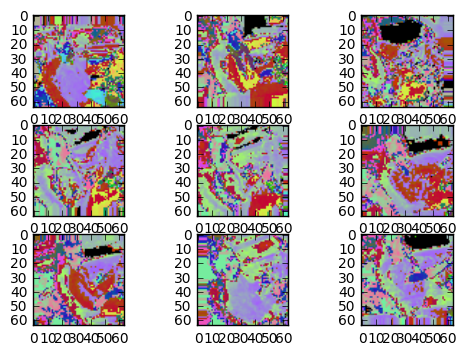

In [10]:
datagen = ImageDataGenerator(
        featurewise_center=True,
        samplewise_center=True,
        featurewise_std_normalization=True,
        samplewise_std_normalization=True,
        zca_whitening=False,
        rotation_range=0,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False
        )
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(64, 64, 3))
    # show the plot
    plt.show()
    break


# Sample Model run

In [11]:
model = VGG16(weights="imagenet", include_top=False)

input_ = Input(shape=(img_rows, img_cols, img_channels), name='image_input')
output_ = model(input_)
x = Flatten(name='flatten')(output_)
x = Dense(4096, activation='linear', name='fc1')(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dense(4096, activation='linear', name='fc2')(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dense(1000, activation='linear', name='fc3')(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dense(nb_classes, activation='softmax', name='predictions')(x)
model = Model(input=input_, output=x)
model.summary()


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
image_input (InputLayer)         (None, 64, 64, 3)     0                                            
____________________________________________________________________________________________________
vgg16 (Model)                    multiple              14714688    image_input[0][0]                
____________________________________________________________________________________________________
flatten (Flatten)                (None, 2048)          0           vgg16[1][0]                      
____________________________________________________________________________________________________
fc1 (Dense)                      (None, 4096)          8392704     flatten[0][0]                    
___________________________________________________________________________________________

In [12]:
from keras.optimizers import RMSprop, SGD, Adagrad, Adam
from keras.callbacks import TensorBoard
learning_rate=1e-2
BATCH_SIZE=10
NUM_EPOCHS=20

In [13]:
tbCallback = TensorBoard(log_dir='./Graph', histogram_freq=0,  
          write_graph=True, write_images=True)

In [15]:
# Optimizers
#sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
rmsprop = RMSprop(lr=learning_rate, rho=0.9, epsilon=1e-01, decay=0.0)
#adagrad = Adagrad(lr=0.001, epsilon=1e-08, decay=0.0)
#adam = Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-02, decay=0.0)

model.compile(loss='categorical_crossentropy', optimizer=rmsprop, metrics=['accuracy'])

model.fit_generator(datagen.flow(X_train, y_train, batch_size=BATCH_SIZE, shuffle=True),\
    validation_data=(X_valid, y_valid),\
    samples_per_epoch=X_train.shape[0],\
    nb_epoch=NUM_EPOCHS, verbose=1, callbacks=[tbCallback])


Epoch 1/20


/usr/local/lib/python3.5/dist-packages/keras/preprocessing/image.py:331: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn'tbeen fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.5/dist-packages/keras/preprocessing/image.py:339: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn'tbeen fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


350/350 [==============================] - 4s - loss: 13.9013 - acc: 0.0971 - val_loss: 14.7212 - val_acc: 0.0867

In [8]:
#>>> tensorboard --logdir path_to_current_dir/Graph 
#http://127.0.0.1:6006/

# Forward convvis: Class Activation Map

In [2]:
import sys
import os
path = os.getcwd()
dirname = os.path.dirname(path)
sys.path.append(dirname)

In [3]:
path+"/c0.jpg"

'/home/joo/Desktop/gitworkspace/TedJeong/mlcore_v0/MLEngine/image_ml_core/dataset/c0.jpg'

In [13]:
# Taken from https://github.com/fchollet/deep-learning-models/blob/master/imagenet_utils.py
from keras.utils.data_utils import get_file
CLASS_INDEX_PATH = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'
fpath = get_file('imagenet_class_index.json',
                 CLASS_INDEX_PATH,
                 cache_subdir='models')
CLASS_INDEX = json.load(open(fpath))

In [18]:
from keras.applications import VGG16
from convvis_keras import *
model = VGG16(weights='imagenet')
image_path = path+"/c0.jpg"
image_path = './imgset/kaggle_statefarm/imgs/train/c0/img_44733.jpg'
preprocessed_input = load_image(image_path)

./imgset/kaggle_statefarm/imgs/train/c0/img_44733.jpg


<class 'numpy.ndarray'> uint8
class :  ['n02791124', 'barber_chair']


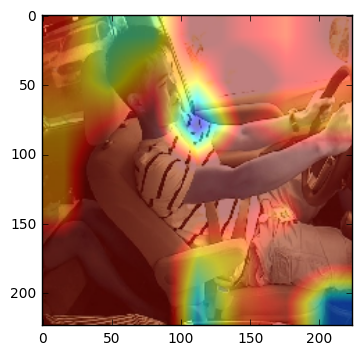

In [19]:
# this weights for imagenet classification
predicted_class = np.argmax(model.predict(preprocessed_input))
cam  = grad_cam(model, preprocessed_input, predicted_class, "block5_pool")
cv2.imwrite("cam.jpg", cam)
print(type(cam), cam.dtype)
print("class : ", CLASS_INDEX[str(predicted_class)])
plt.imshow(cam)
plt.show()

# Forward convvis : Feature Map

### On filter weights

In [93]:
# taken from https://github.com/julienr/ipynb_playground/blob/master/keras/convmnist/keras_cnn_mnist.ipynb


# utility functions
from mpl_toolkits.axes_grid1 import make_axes_locatable

def nice_imshow(ax, data, vmin=None, vmax=None, cmap=None):
    """Wrapper around pl.imshow"""
    if cmap is None:
        cmap = cm.jet
    if vmin is None:
        vmin = data.min()
    if vmax is None:
        vmax = data.max()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    im = ax.imshow(data, vmin=vmin, vmax=vmax, interpolation='nearest', cmap=cmap)
    plt.colorbar(im, cax=cax)



import numpy.ma as ma
def make_mosaic(imgs, nrows, ncols, border=1):
    """
    Given a set of images with all the same shape, makes a
    mosaic with nrows and ncols
    """
    nimgs = imgs.shape[0]
    imshape = imgs.shape[1:]
    
    mosaic = ma.masked_all((nrows * imshape[0] + (nrows - 1) * border,
                            ncols * imshape[1] + (ncols - 1) * border),
                            dtype=np.float32)
    
    paddedh = imshape[0] + border
    paddedw = imshape[1] + border
    for i in range(nimgs):
        row = int(np.floor(i / ncols))
        col = i % ncols
        
        mosaic[row * paddedh:row * paddedh + imshape[0],
               col * paddedw:col * paddedw + imshape[1]] = imgs[i]
    return mosaic

#pl.imshow(make_mosaic(np.random.random((9, 10, 10)), 3, 3, border=1))

23 layers
(3, 3, 64)
(2, 2, 3)
(3, 2, 2)
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]] 
 [[[ 1  7]
  [ 4 10]]

 [[ 2  8]
  [ 5 11]]

 [[ 3  9]
  [ 6 12]]] 
 [[[ 1  7]
  [ 4 10]]

 [[ 2  8]
  [ 5 11]]

 [[ 3  9]
  [ 6 12]]]
(64, 3, 3)


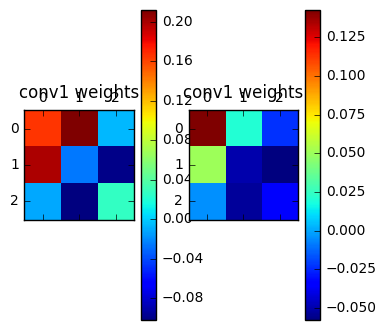

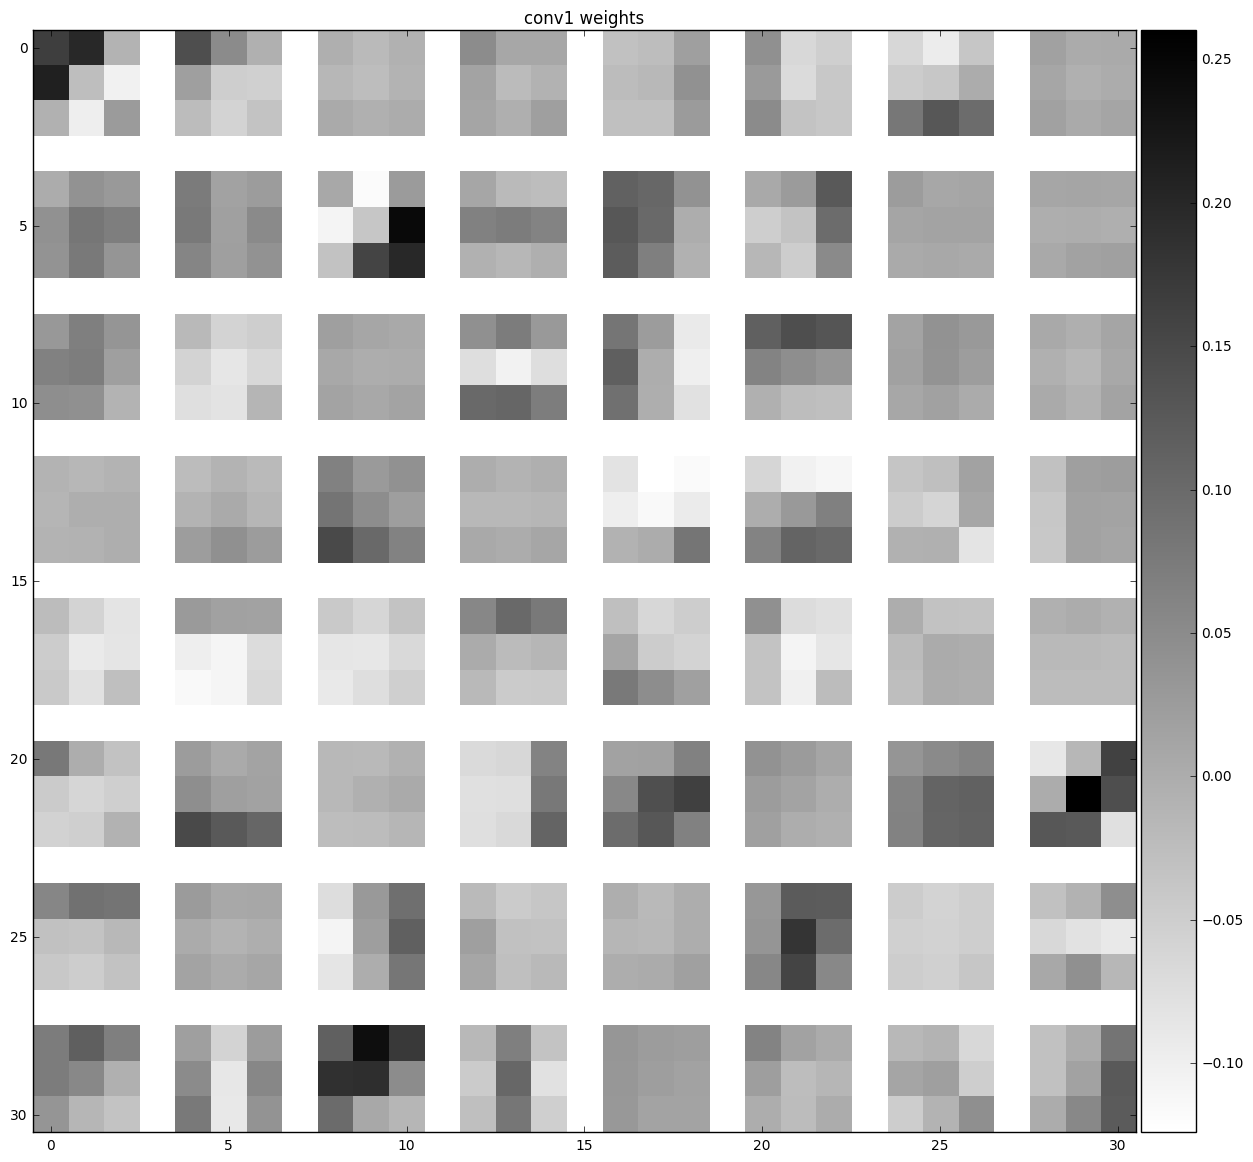

In [111]:
import pprint
print(len(model.layers), 'layers')
pprint.pprint(model.layers)
W, B = model.layers[2].get_weights() # shape: (H x W x C x ), ()
W = np.squeeze(W)
print(W[:,:,0].shape)

fig = plt.figure()
ax = fig.add_subplot(1,3,1)
plt.title('conv1 weights')
cax = ax.matshow(W[:,:,0,0], interpolation='nearest')
fig.colorbar(cax)

ax = fig.add_subplot(1,3,2)
plt.title('conv1 weights')
cax = ax.matshow(W[:,:,0,1], interpolation='nearest')
fig.colorbar(cax)
#plt.imshow()
# test
a = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
print(a.shape)
a_trans = np.transpose(a, [2,1,0])
print(a_trans.shape)
print(a,"\n", a_trans, "\n", a.T)
print(W[:,:,0].T.shape)

# Weights for first conv layers
plt.figure(figsize=(15, 15))
plt.title('conv1 weights')
nice_imshow(plt.gca(), make_mosaic(W[:,:,0].T, 8, 8), cmap=cm.binary)


### On Layer activation

[get output of each layer](http://stackoverflow.com/questions/41711190/keras-how-to-get-the-output-of-each-layer)  
[modify feature map](http://stackoverflow.com/questions/41695855/modifying-feature-maps-in-keras)

(None, 224, 224, 3)
23
(224, 224, 64)


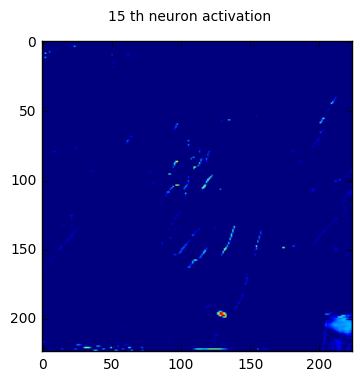

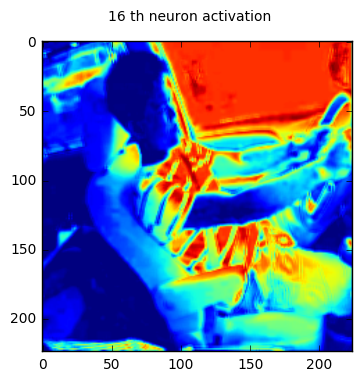

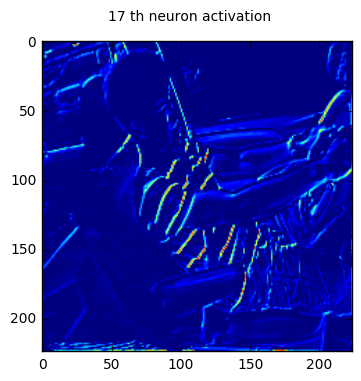

In [141]:
sample_output = model.layers[2].output

input_ = model.input
input_shape = model.input_shape
print(input_shape)
outputs_ = [layer.output for layer in model.layers]
functors = K.function([input_] + [K.learning_phase()], outputs_)

#convout1_f = K.function([model.get_input(train=False)], conv1)

# feed forwarding random x
"""
test = np.random.random(input_shape[1:])[np.newaxis, ...]
layer_outputs = functors([test, 1.])
print(len(layer_outputs))
print(layer_outputs[1][0,:,:,:].shape)
# 15th neuron activation
print(plt.imshow(layer_outputs[1][0,:,:,15]))
"""
test = mpimage.imread('./imgset/kaggle_statefarm/imgs/train/c0/img_44733.jpg')
test = cv2.resize(test, (224,224))
test = test[np.newaxis,...]
layer_outputs = functors([test, 1.])
print(len(layer_outputs))
print(layer_outputs[1][0,:,:,:].shape)
# 15th~17th neuron activation in first conv for VGG16

for i in range(3):
    fig = plt.figure()
    fig.suptitle("{:d} th neuron activation".format(i+15))
    plt.imshow(layer_outputs[1][0,:,:,15+i])
plt.show()

Deconv : with backprop, with guided backprop, with smooth ; see lec9